## Capstone Project (Walmart)

#### Problem Statement 1:

    A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply

#### Import the Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("Walmart DataSet.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# View data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Convert date to datetime format and splitting date column into day, month and year
df['Date'] =  pd.to_datetime(df.Date, format='%d-%m-%Y')

df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [5]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,26,10,2012


In [6]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Day                      int32
Month                    int32
Year                     int32
dtype: object

In [7]:
df.shape

(6435, 11)

In [8]:
# Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [9]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019


In [10]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019


In [11]:
# Check for unique values

df.nunique().sort_values()

Holiday_Flag       2
Year               3
Month             12
Day               31
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [12]:
# Check for Duplicated Data
df.duplicated().sum()

0

In [13]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [14]:
df.corr(numeric_only=True).round(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Store,1.00,-0.34,-0.00,-0.02,0.06,-0.21,0.22,0.00,0.00,0.00
Weekly_Sales,-0.34,1.00,0.04,-0.06,0.01,-0.07,-0.11,-0.02,0.08,-0.02
Holiday_Flag,-0.00,0.04,1.00,-0.16,-0.08,-0.00,0.01,0.04,0.12,-0.06
Temperature,-0.02,-0.06,-0.16,1.00,0.14,0.18,0.10,0.03,0.24,0.06
Fuel_Price,0.06,0.01,-0.08,0.14,1.00,-0.17,-0.03,0.03,-0.04,0.78
CPI,-0.21,-0.07,-0.00,0.18,-0.17,1.00,-0.30,0.00,0.00,0.07
Unemployment,0.22,-0.11,0.01,0.10,-0.03,-0.30,1.00,-0.00,-0.01,-0.24
Day,0.00,-0.02,0.04,0.03,0.03,0.00,-0.00,1.00,0.02,0.01
Month,0.00,0.08,0.12,0.24,-0.04,0.00,-0.01,0.02,1.00,-0.19
Year,0.00,-0.02,-0.06,0.06,0.78,0.07,-0.24,0.01,-0.19,1.00


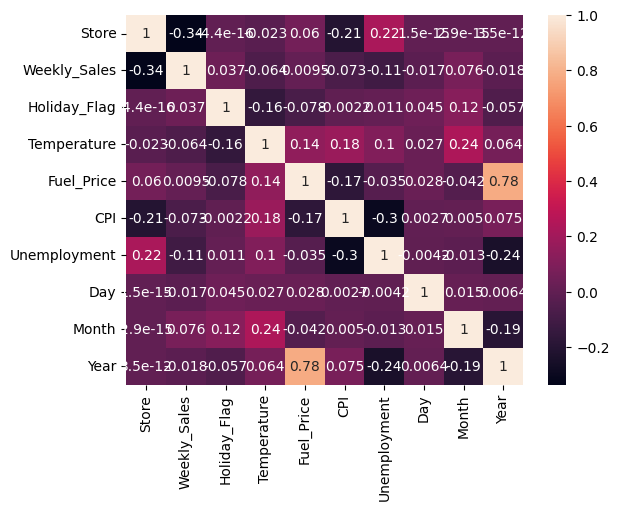

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

The histograms with KDE curves show the distributions of Weekly_Sales, Temperature, CPI, Fuel_Price, and Unemployment.

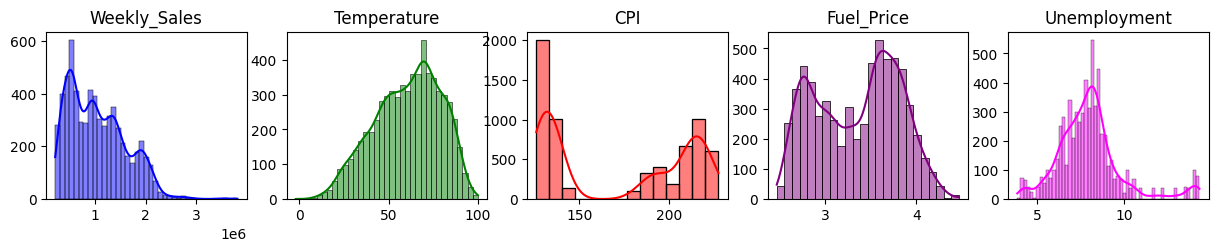

In [16]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
plt.figure(figsize=(15,10))
colors = ['blue', 'green', 'red', 'purple','magenta']
for i,colum  in enumerate(columns,1):
    plt.subplot(4,5,i)
    sns.histplot(df[colum],color=colors[i-1],kde=True)
    plt.title(colum)
    plt.xlabel('')  # Empty string removes the label
    plt.ylabel('') 

#### Box plots for Weekly_Sales, Temperature, CPI, Fuel_Price, and Unemployment to show detect any outliers in these variables.

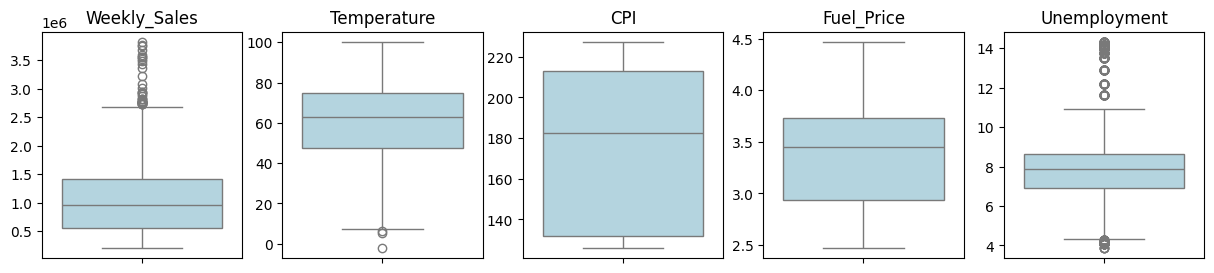

In [17]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
plt.figure(figsize=(15,10))
for i,colum  in enumerate(columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(data=df, y=colum,color='lightblue')
    plt.xlabel('')  # Empty string removes the label
    plt.ylabel('') 
    plt.title(colum)

#### Dropping the outliers

In [18]:
Q1 = df.Unemployment.quantile(0.25)
Q3 = df.Unemployment.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Unemployment >= Q1 - 1.5 * IQR) & (df.Unemployment <= Q3 + 1.5 * IQR)]

In [19]:
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Weekly_Sales >= Q1 - 1.5 * IQR) & (df.Weekly_Sales <= Q3 + 1.5 * IQR)]

In [20]:
Q1 = df.Temperature.quantile(0.25)
Q3 = df.Temperature.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Temperature >= Q1 - 1.5 * IQR) & (df.Temperature <= Q3 + 1.5 * IQR)]

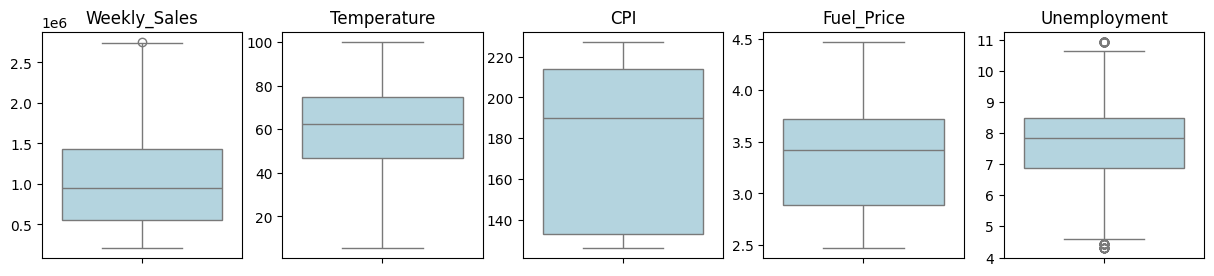

In [21]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
plt.figure(figsize=(15,10))
for i,colum  in enumerate(columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(data=df, y=colum,color='lightblue')
    plt.xlabel('')  # Empty string removes the label
    plt.ylabel('') 
    plt.title(colum)

#### a) Which store has maximum sales?

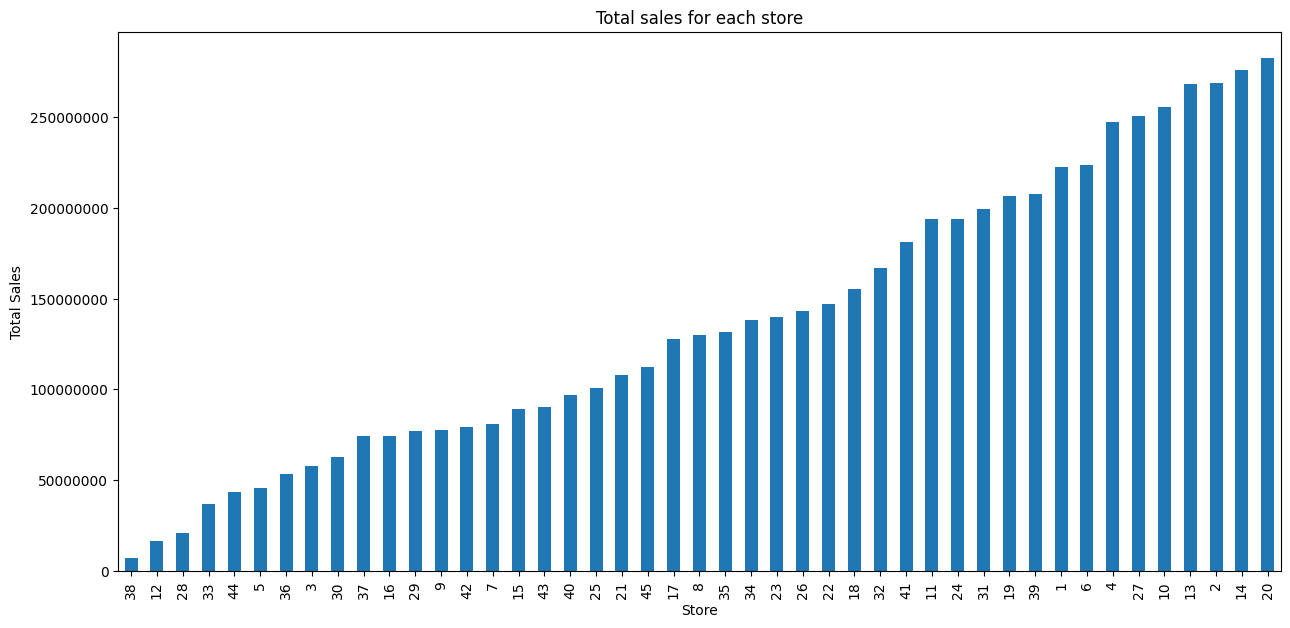

In [22]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')
plt.show()

From the above graph, it is visible that the store which has maximum sales is store number 20 and the store which has minimum sales is the store number 33.

<hr>

#### b) Provide a monthly and semester view of sales in units and give insights.

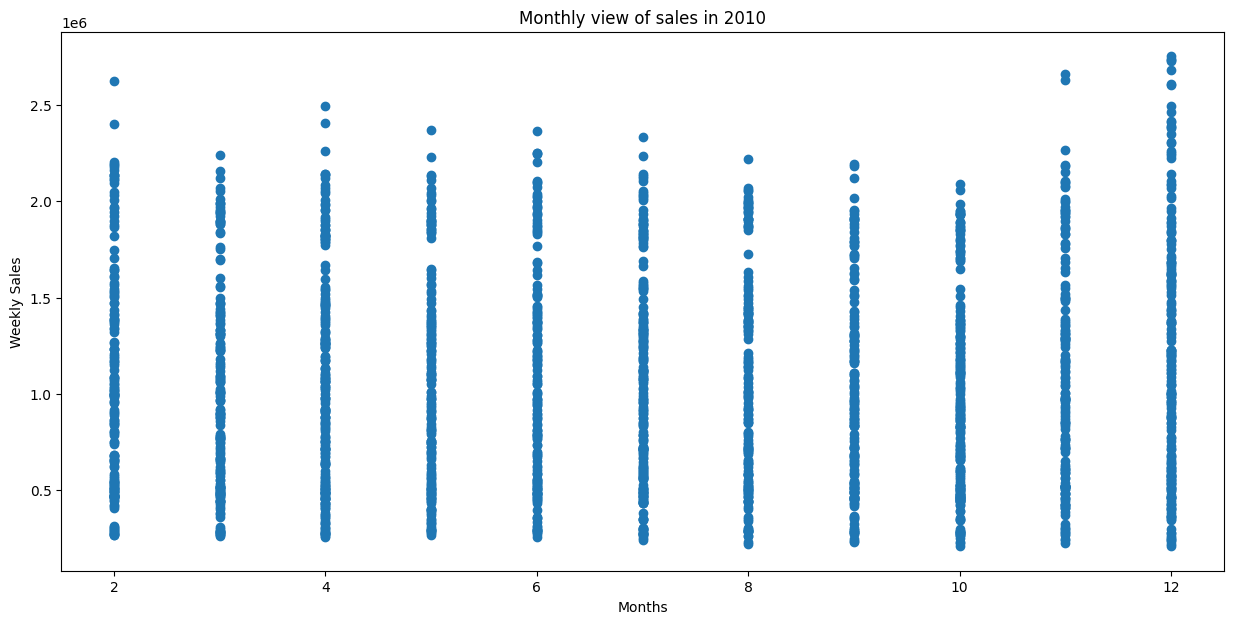

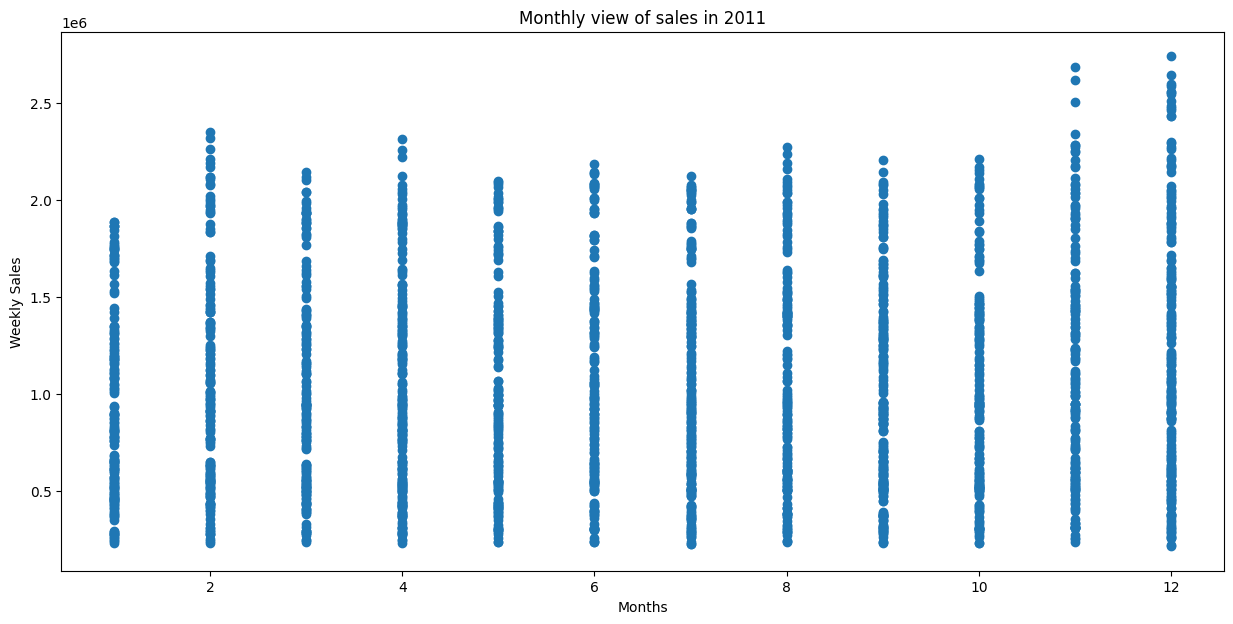

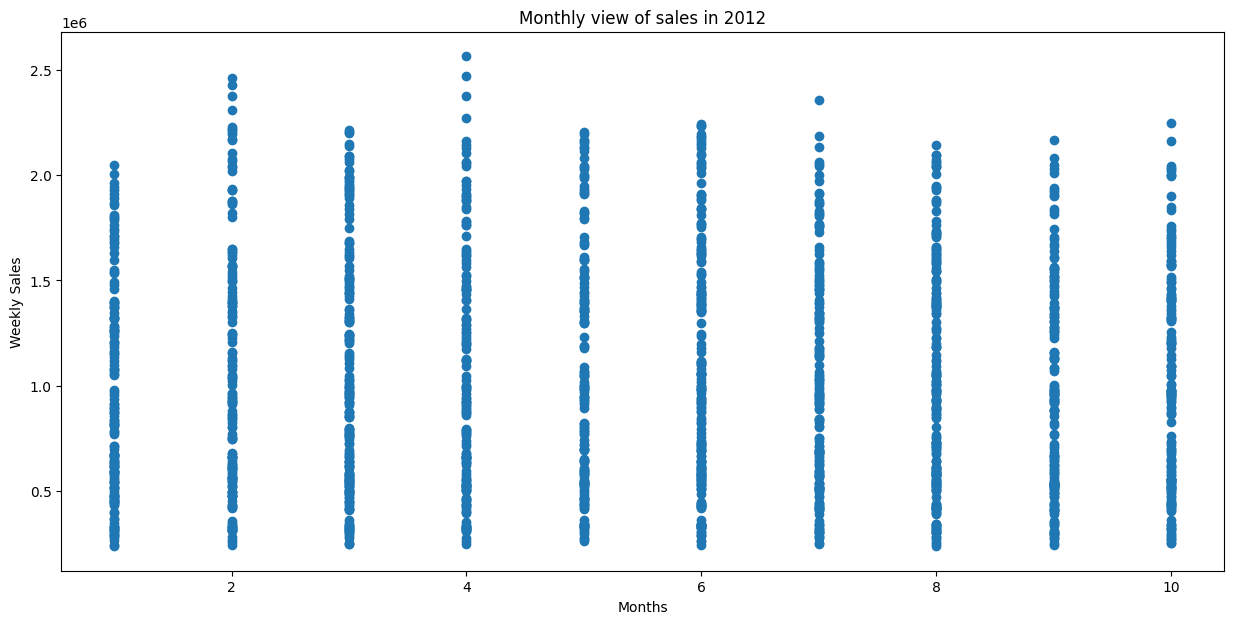

In [23]:
#Year-wise Monthly Sales

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

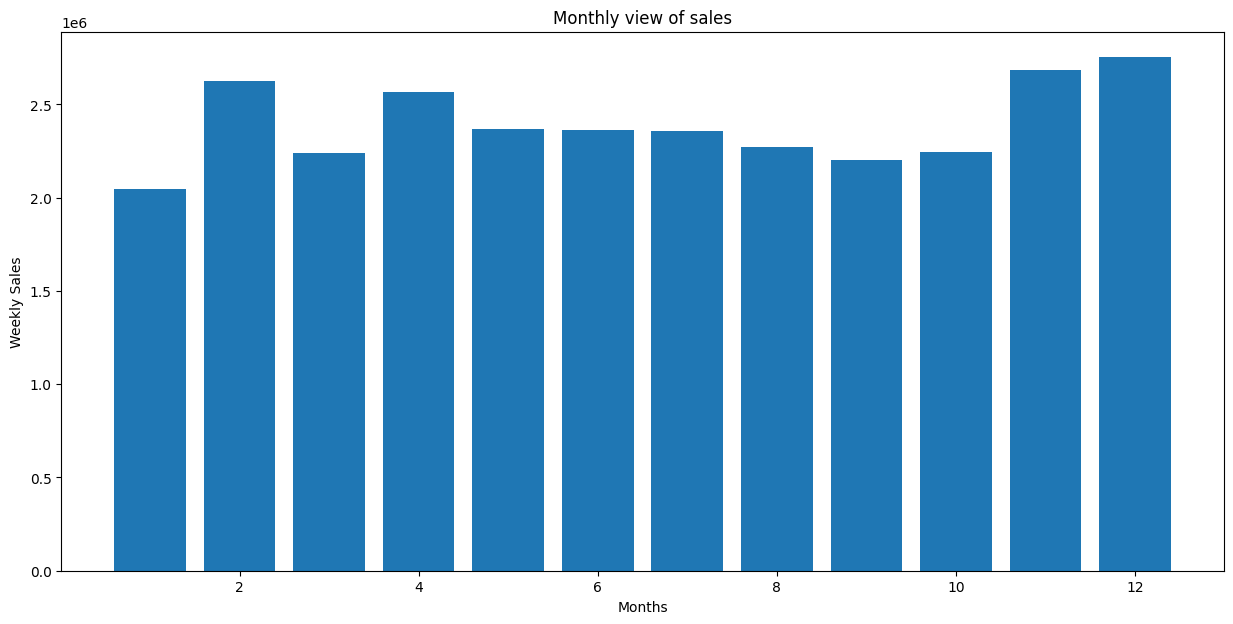

In [24]:
#Overall Monthly Sales
plt.figure(figsize=(15,7))
plt.bar(df["Month"],df["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

<Figure size 1500x700 with 0 Axes>

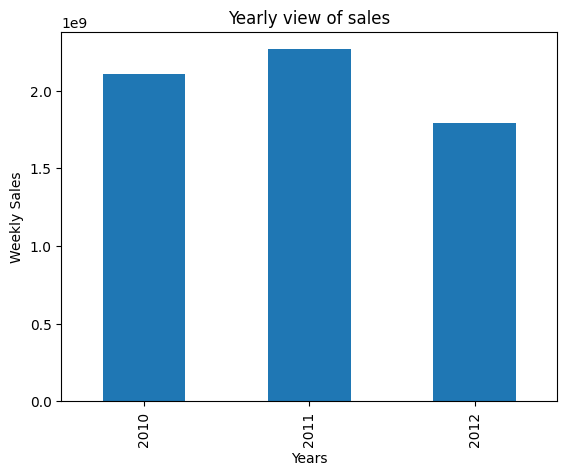

In [25]:
#Yearly Sales
plt.figure(figsize=(15,7))
df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()

Overall monthly sales are higher in the month of December while the yearly sales in the year 2011 are the highest.

<hr>

#### c. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [27]:
# Correlation between Unemployment and Weekly_Sales
corr_unemployment_sales = df[['Unemployment', 'Weekly_Sales']].corr()
print(corr_unemployment_sales)

              Unemployment  Weekly_Sales
Unemployment      1.000000     -0.074367
Weekly_Sales     -0.074367      1.000000


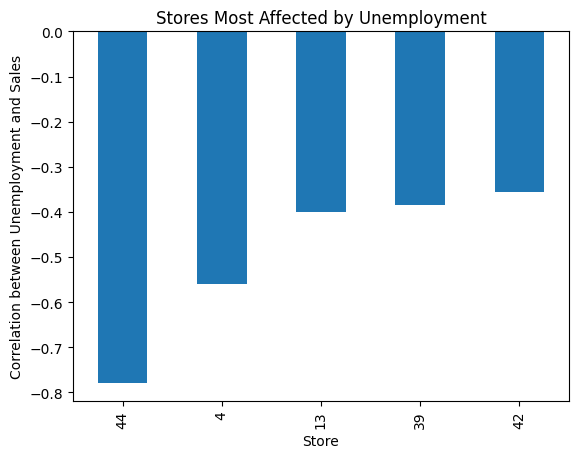

In [29]:
# Group data by store and calculate the correlation per store
unemployment_sales_per_store = df.groupby('Store').apply(lambda x: x[['Unemployment', 'Weekly_Sales']].corr().iloc[0, 1])

# Find the stores with the highest negative impact and plot the correlation
worst_affected_stores = unemployment_sales_per_store.sort_values().head(5)
worst_affected_stores.plot(kind='bar', title='Stores Most Affected by Unemployment')
plt.ylabel('Correlation between Unemployment and Sales')
plt.show()

Correlation value ranges from approximately -0.4 to -0.8, which is a negative correlation. So higher unemployment in the region correlation with lower sales in thse stores. 

#### box plot of weekly sales by unemployement categories

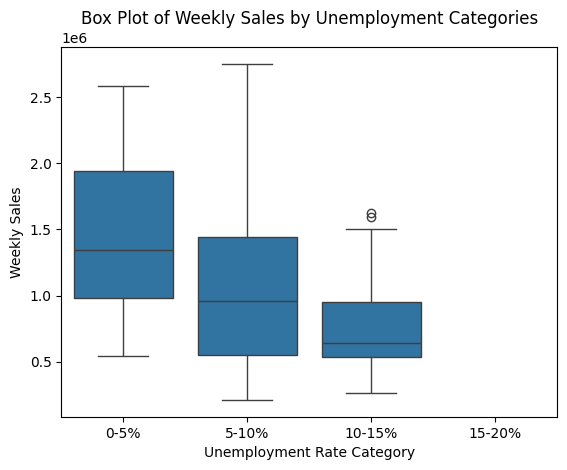

In [30]:
df['Unemployment_Category'] = pd.cut(df['Unemployment'], bins=[0, 5, 10, 15, 20], labels=['0-5%', '5-10%', '10-15%', '15-20%'])
sns.boxplot(x='Unemployment_Category', y='Weekly_Sales', data=df)
plt.title('Box Plot of Weekly Sales by Unemployment Categories')
plt.xlabel('Unemployment Rate Category')
plt.ylabel('Weekly Sales')
plt.show()

#### barplot for Unemployment vs Weekly Sales by year

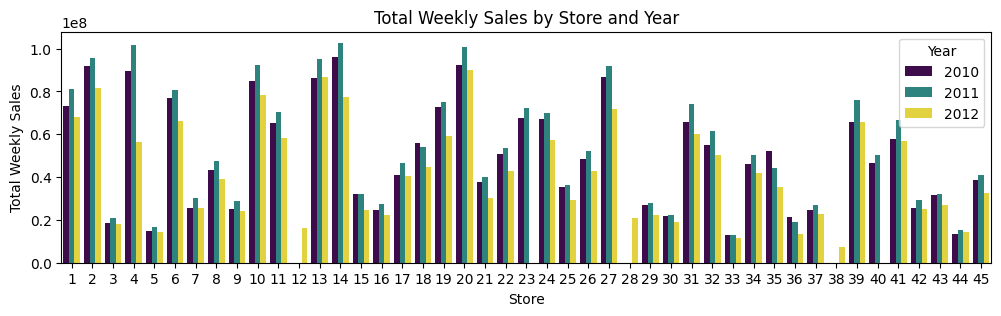

In [32]:
store_year_sales = df.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 3))
sns.barplot(x='Store', y='Weekly_Sales', hue='Year', data=store_year_sales, palette='viridis')
plt.title('Total Weekly Sales by Store and Year')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

<hr>

#### d) If the weekly sales show a seasonal trend, when and what could be the reason?

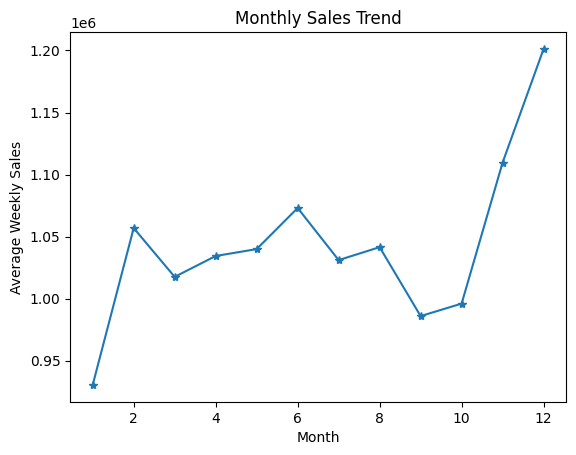

In [33]:
# Group data by Month and plot sales trend
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

monthly_sales.plot(kind='line', marker='*', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

Yes, the plot clearly shows a seasonal trend, especially towards the end of the year:

- In December due to Christmas and New Year sales are high.
- In June it could be due to summer shopping or after vacation back to school shopping there is a slight increase in sales.
- In September there is a dip, which shows there is a less shopping because there is no holiday season.

<hr>

#### e) Does temperature affect the weekly sales in any manner?

              Temperature  Weekly_Sales
Temperature      1.000000     -0.044403
Weekly_Sales    -0.044403      1.000000


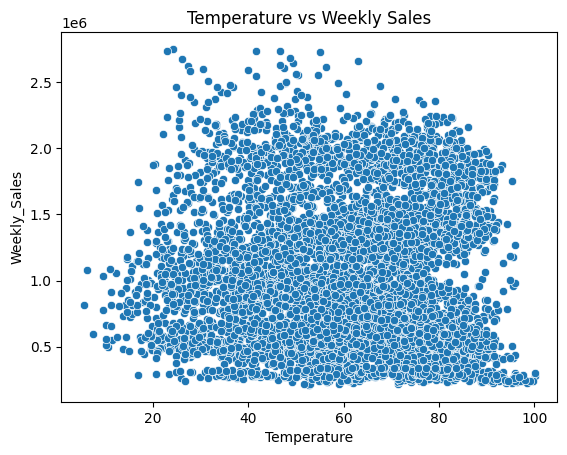

In [36]:
# Correlation between Temperature and Weekly Sales
corr_temp_sales = df[['Temperature', 'Weekly_Sales']].corr()
print(corr_temp_sales)

# Scatter plot of Temperature vs Weekly Sales
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Weekly Sales')
plt.show()

Temperature does not significantly affect weekly sales based on the scatter plot

<hr>

#### f) How is the Consumer Price index affecting the weekly sales of various stores?

                   CPI  Weekly_Sales
CPI           1.000000     -0.083295
Weekly_Sales -0.083295      1.000000


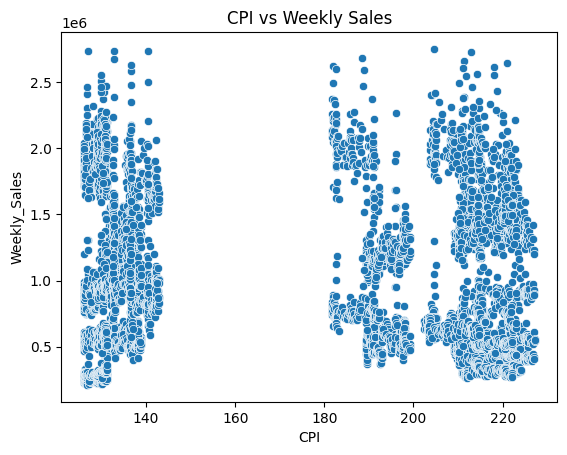

In [37]:
# Correlation between CPI and Weekly Sales
corr_cpi_sales = df[['CPI', 'Weekly_Sales']].corr()
print(corr_cpi_sales)

# Scatter plot of CPI vs Weekly Sales
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('CPI vs Weekly Sales')
plt.show()

The scatter plot suggests that CPI has a weak or non-linear correlation with weekly sales, based on the variability in sales for different CPI ranges.

<HR>

#### g) Top performing stores according to the historical data.

Store
20    2.827759e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64


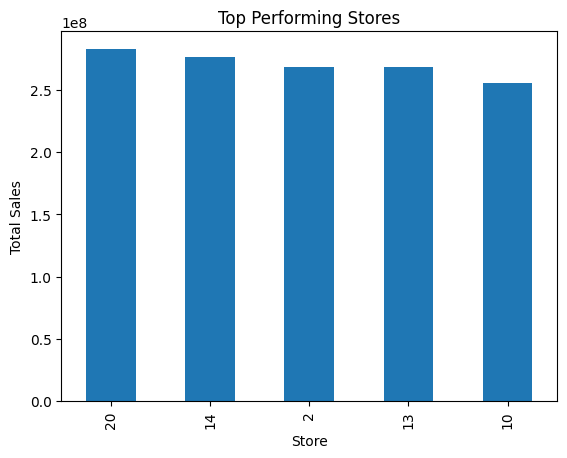

In [38]:
# Total sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(store_sales.head())

# Bar plot of top 5 stores
store_sales.head(5).plot(kind='bar', title='Top Performing Stores')
plt.ylabel('Total Sales')
plt.show()

<hr>

#### h) The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [39]:
# Worst performing store
worst_performing_store = store_sales.tail(1)
print('Worst performing store:', worst_performing_store)

Worst performing store: Store
38    7347378.89
Name: Weekly_Sales, dtype: float64


Difference between highest and lowest performing stores: 275428478.0


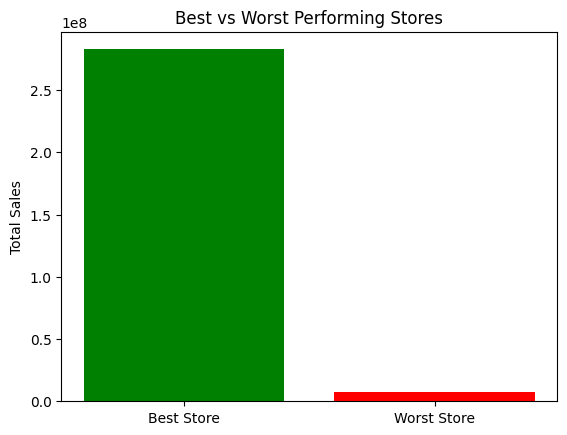

In [40]:
# Difference between highest and lowest performing stores
difference = store_sales.max() - store_sales.min()
print(f'Difference between highest and lowest performing stores: {difference}')

# Bar plot comparison
plt.bar(['Best Store', 'Worst Store'], [store_sales.max(), store_sales.min()], color=['green', 'red'])
plt.title('Best vs Worst Performing Stores')
plt.ylabel('Total Sales')
plt.show()

The chart shows the huge difference between the best-performing and worst-performing stores.

<hr>

#### g) Use predictive modelling techniques to forecast the sales for each store for the next 12 weeks.

Predicting next 12 weeks for Store 1

In [44]:
# Preparing data for Prophet
df = df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

In [45]:
# Selecting data for a single store as an example
store_1 = df[df['Store'] == 1]

In [46]:
# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(store_1)

10:19:04 - cmdstanpy - INFO - Chain [1] start processing
10:19:04 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# Predict future sales
future_dates = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future_dates)

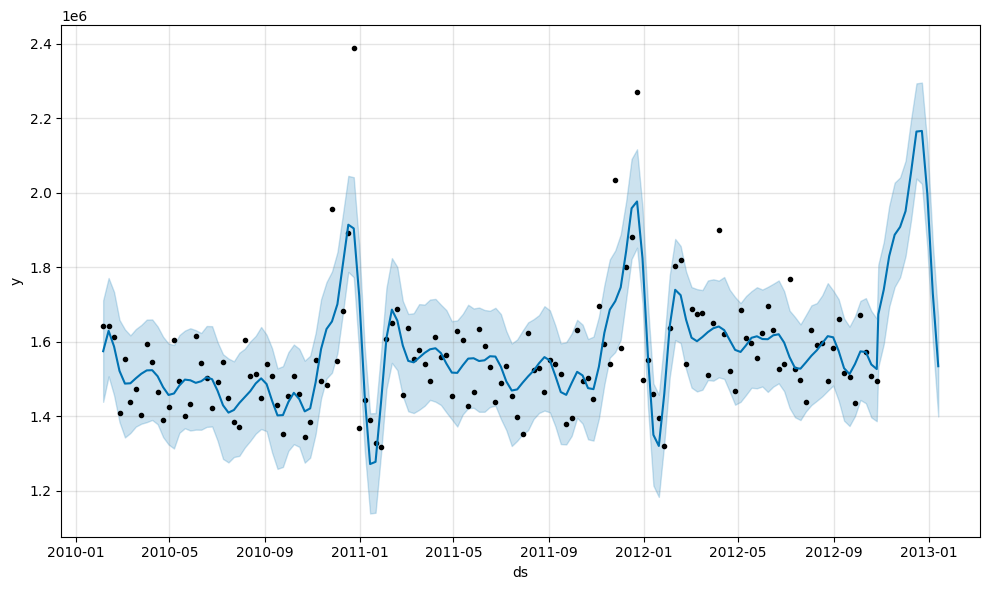

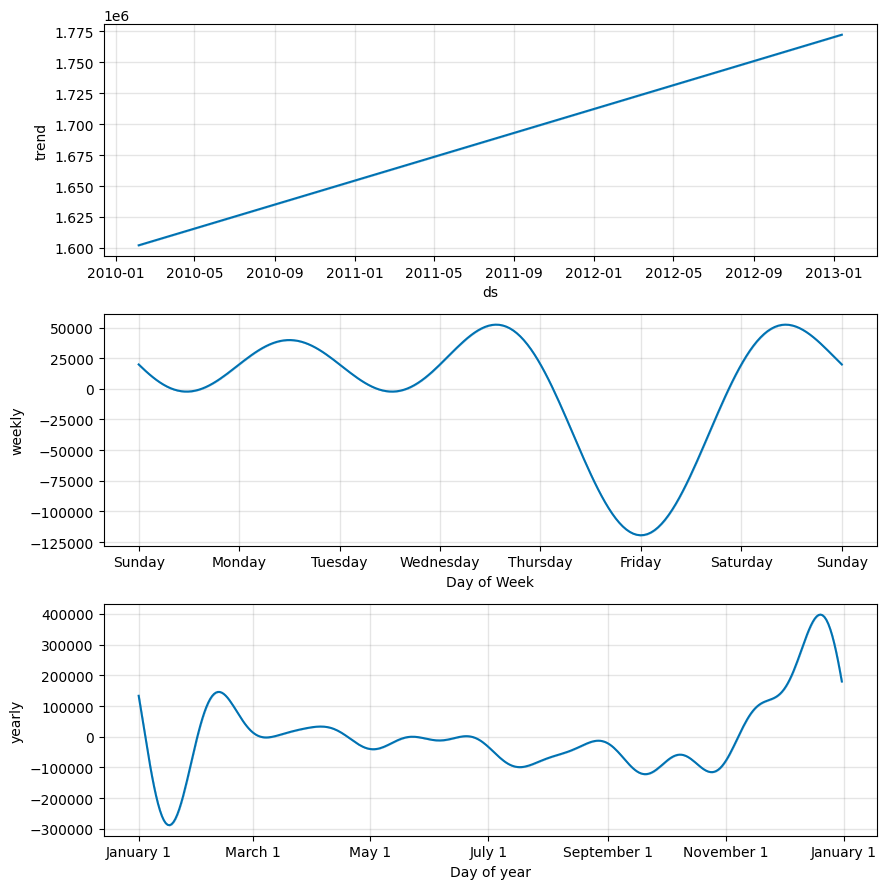

In [48]:
# Plotting the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [50]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

            ds          yhat    yhat_lower    yhat_upper
143 2012-10-28  1.673724e+06  1.532464e+06  1.807094e+06
144 2012-11-04  1.740037e+06  1.594051e+06  1.868342e+06
145 2012-11-11  1.830312e+06  1.694081e+06  1.965182e+06
146 2012-11-18  1.887422e+06  1.747551e+06  2.027511e+06
147 2012-11-25  1.908516e+06  1.773303e+06  2.041601e+06
148 2012-12-02  1.951051e+06  1.830107e+06  2.086134e+06
149 2012-12-09  2.054140e+06  1.925792e+06  2.195941e+06
150 2012-12-16  2.164716e+06  2.038601e+06  2.294098e+06
151 2012-12-23  2.166319e+06  2.024165e+06  2.296198e+06
152 2012-12-30  1.996406e+06  1.852939e+06  2.131666e+06
153 2013-01-06  1.730351e+06  1.600292e+06  1.865878e+06
154 2013-01-13  1.534476e+06  1.399618e+06  1.664828e+06


In [51]:
# To save the forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12).to_csv('forecasted_sales.csv')

<hr>